In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from itertools import combinations
%matplotlib inline

In [2]:
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

In [10]:
df = pd.read_csv('../input/amazon-sales-dataset/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [13]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [14]:
# rating_count에 결측값이 있는 행들만 출력

df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [15]:
df.dropna(subset=['rating_count'], inplace=True)

In [16]:
# 숫자 값으로 변환
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%','').astype(float)/100
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)

# rating column에서 빈 문자열이나 공백을 NaN으로 대체
df['rating'] = df['rating'].replace('', pd.NA).str.strip()
# rating에 유효한 숫자가 아닌 값이 있는 행 제거
df = df.dropna(subset=['rating'])
df = df[df['rating'].apply(lambda x: x.replace('.', '', 1).isdigit())]
# rating column 을 float로 변환
df['rating'] = df['rating'].astype(float)

In [17]:
# product_id에 중복된 값이 있는지 확인

df['product_id'].duplicated().any()

True

In [18]:
# product_id가 중복된 모든 행을 True로 표시, 중복된 product_id만을 출력
duplicate_rows = df[df['product_id'].duplicated(keep=False)]
print(duplicate_rows['product_id'] )

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1007    B0B9BXKBC7
1010    B07GVGTSLN
1017    B0B9BD2YL4
1018    B0BMXMLSMM
1019    B0141EZMAI
Name: product_id, Length: 206, dtype: object


### 평균 평점과 리뷰 수에 따른 제품 특성 분석
- rating과 rating_count에 따른 제품 카테고리별 특성 분석
- 카테고리별 평균 평점과 리뷰 수를 계산

In [26]:
category_rating_summary = df.groupby('category').agg({
    'rating': 'mean',
    'rating_count': 'mean'
}).reset_index()

print(category_rating_summary)

                                              category    rating  rating_count
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000   1118.000000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000   2983.000000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000   7222.000000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000   8886.500000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000   6273.500000
..                                                 ...       ...           ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000   4210.000000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000   4062.500000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000   4084.500000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333   3495.666667
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000  15867.000000

[211 rows x 3 columns]


**[결론]**
- 리뷰 수(rating_count)가 많다는 것은 해당 카테고리의 제품들이 소비자들 사이에서 인기가 있거나 많이 구매되었음을 의미
- 어떤 카테고리에서 리뷰 수가 다른 카테고리보다 훨씬 많다면 그 카테고리는 트렌드에 민감하거나 사람들이 많이 찾는 분야일 가능성이 큼
- 평균 평점(rating)이 높다면 해당 카테고리의 제품들은 대체로 품질이 좋고 소비자 만족도가 높음, 평균이 낮다면 제품 품질 개선 필요
- 특정 카테고리의 평균 평점이 다른 카테고리보다 유독 낮다면, 그 카테고리의 전반적인 품질 문제나 소비자 기대에 못 미치는 부분이 있음
- 어떤 카테고리는 리뷰 수가 많으면서도 높은 평균 평점을 보일 수 있고, 반대로 리뷰 수는 적지만 평균 평점이 높은 카테고리도 있음
- 리뷰가 많다고 무조건 평점이 높지 않을 수도 있고, 리뷰가 적지만 평점이 높은 경우는 특정 카테고리의 제품들이 만족도가 높을 수 있음

#### 리뷰 수가 많은데 평균 평점이 낮다면, 해당 카테고리의 제품 품질 개선이나 소비자 피드백을 반영한 업그레이드가 필요함
#### 반대로, 평점이 높고 리뷰 수가 많다면 그 카테고리는 마케팅이나 프로모션을 강화 해야함

품질 개선이 필요한 카테고리:
평균 평점이 상대적으로 낮은 카테고리는 품질 개선이나 소비자 피드백에 대한 대응이 필요할 수 있습니다.
    
인기 있는 카테고리:
리뷰 수가 많은 카테고리는 소비자들이 자주 찾는 카테고리로, 마케팅 및 판매 전략을 집중할 수 있는 분야입니다.

---

### 가격 및 할인율과 평점의 상관관계 분석
- actual_price, discounted_price, discount_percentage가 평점 및 리뷰 수와 어떤 상관관계가 있는지 분석

In [22]:
correlation_matrix = df[['rating', 'rating_count', 'discounted_price', 'actual_price', 'discount_percentage']].corr()
print(correlation_matrix)

                       rating  rating_count  discounted_price  actual_price  \
rating               1.000000      0.102235          0.121132      0.122467   
rating_count         0.102235      1.000000         -0.027304     -0.036215   
discounted_price     0.121132     -0.027304          1.000000      0.961910   
actual_price         0.122467     -0.036215          0.961910      1.000000   
discount_percentage -0.155679      0.011294         -0.242298     -0.117855   

                     discount_percentage  
rating                         -0.155679  
rating_count                    0.011294  
discounted_price               -0.242298  
actual_price                   -0.117855  
discount_percentage             1.000000  


가격과 평점 간의 상관관계:
- actual_price와 rating 간의 상관계수는 0.121로, 약한 양의 상관관계가 존재함. 즉, 가격이 높을수록 평점도 약간 증가하는 경향이 있으므로 비싼 제품이 더 좋은 품질로 인식될 가능성이 있음

할인율과 평점 간의 상관관계:
- discount_percentage와 rating 간의 상관계수는 -0.155로, 약한 음의 상관관계가 있음. 할인율이 높을수록 평점이 약간 낮아지는 경향이 있으며 높은 할인율로 판매되는 제품들이 품질에 대한 의심이 있을 수 있다는 인식

할인율과 리뷰 수 간의 상관관계:
- discount_percentage와 rating_count 간의 상관계수는 0.012로, 거의 상관관계가 없음. 할인율이 높다고 해서 반드시 더 많은 리뷰가 발생하지는 않음

가격 간의 상관관계:
- actual_price와 discounted_price는 0.96으로 매우 높은 상관관계를 보임. 가격이 비싼 제품일수록 할인 후 가격도 여전히 높은 경향이 있음

**[결론]**
1. 가격과 평점의 상관관계:
- 만약 가격이 높을수록 평점이 높아지는 경향이 나타난다면, 이는 소비자들이 더 비싼 제품을 고품질로 인식하고 높은 가격을 지불할 가치가 있다고 생각
- 가격이 높을수록 평점이 낮아지는 경우, 소비자들이 가격 대비 제품 품질에 불만을 갖고 있음. 이 경우, 비싼 제품의 가치가 충분하지 않다고 인식
- 가격이 평점에 별다른 영향을 미치지 않는다면, 소비자들은 가격에 관계없이 제품의 고유 품질에 따라 평점을 매길 가능성이 큼
2. 할인율과 평점의 상관관계:
- 할인율이 높을수록 평점이 높아진다면, 할인된 가격으로 제품을 구매한 소비자들이 만족감을 느끼고 긍정적인 피드백을 남김. 이는 높은 할인율이 소비자 만족도를 높이고 긍정적인 평가로 이어질 가능성이 있음
- 할인율이 높을수록 평점이 낮아지는 경향이 있다면, 높은 할인율로 인해 소비자들이 제품의 품질에 대한 기대치를 낮추거나, 재고 처리를 위해 할인된 저품질 제품일 수 있음
- 할인율이 평점에 큰 영향을 미치지 않는다면, 소비자들이 가격보다는 제품의 본질적인 품질에 따라 평가하고 있음
3. 가격과 할인율의 상관관계 분석을 통해 얻는 추가 인사이트:
- 할인율이 높고 가격이 낮은 제품이 좋은 평점을 받는다면, 저렴한 제품을 선호하는 소비층이 형성되어 있음
- 비싼 제품이 높은 할인율을 제공하면서도 평점이 높다면, 이러한 가격 할인 전략이 성공적으로 소비자의 만족을 이끌어냈다는 것을 보여줌

#### 결과적으로, 이 상관관계 분석은 가격 전략과 할인 전략이 소비자 만족도에 어떤 영향을 미치는지 파악
#### => 마케팅 전략, 가격 책정, 제품 품질 개선에 도움

---

### 할인율과 리뷰 수 간 상관관계 분석
- 높은 할인율이 더 많은 리뷰를 끌어내는지 분석
- discount_percentage와 rating_count 간의 상관관계 시각화

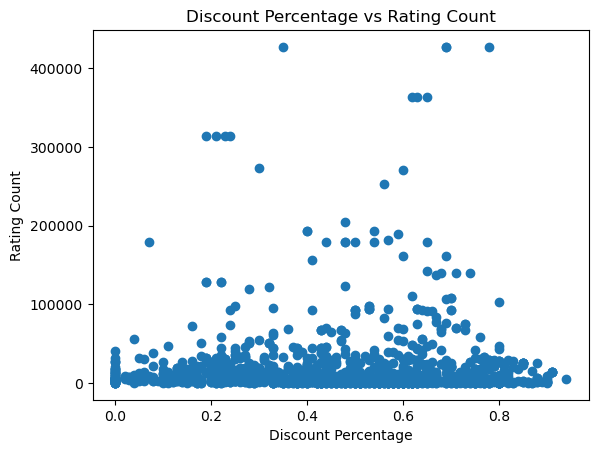

In [23]:
plt.scatter(df['discount_percentage'], df['rating_count'])
plt.title('Discount Percentage vs Rating Count')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating Count')
plt.show()

In [ ]:
- discount_percentage와 rating_count 간의 상관계수는 0.012로 매우 약한 양의 상관관계를 보임. 즉, 할인율과 리뷰 수는 거의 연관성이 없음
- 할인율이 높아진다고 해서 소비자들이 더 많은 리뷰를 남기지는 않는다는 것 같음. 
- 할인율이 제품의 리뷰 수에 직접적인 영향을 미치지 않는 경우가 많음.
- 할인율이 소비자 리뷰에 크게 영향을 미치지 않는다는 것은 소비자들이 단순히 할인만 보고 제품을 구매하거나 리뷰를 남기지 않는다는 것을 의미
- 제품의 품질이나 기능이 할인율보다 더 중요한 것 같음
- 높은 할인율이 필연적으로 더 많은 리뷰나 긍정적인 소비자 피드백을 유도하지 않는다는 점에서 단순한 가격 할인보다는 품질 개선, 사용자 경험, 제품의 실제 가치에 초점을 맞춘 마케팅 전략이 필요함
- 할인율을 지나치게 높여도 리뷰 수나 평점이 오르지 않을 수 있으므로 적정 할인율을 설정하여 브랜드 이미지나 수익성을 유지하는 것이 중요

**[결론]**
- 할인율과 리뷰 수 간의 상관관계는 약하므로 할인율만으로 리뷰를 늘리기 위한 전략은 효과가 제한적일 수 있음
- 제품 품질과 사용자 경험을 개선하는 것이 더 효과적인 전략일 것 같음

---

### 가격 대비 평점 비교
- 제품의 실제 가격(actual_price)과 평점(rating) 간의 관계를 분석해, 가격 대비 평점이 높은 제품을 파악

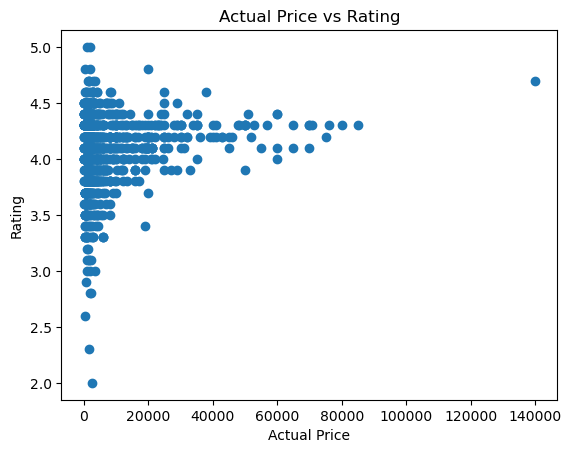

In [24]:
plt.scatter(df['actual_price'], df['rating'])
plt.title('Actual Price vs Rating')
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.show()

**[결론]**
- 적절한 가격 전략 필요